<div align="left">
<img src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr" width="100" height="130" align="left" style="margin-right: 50px">
</div>

# Computational Methods homeworks

Homework 7

<div align="right" style="width: 99.5%;">
Estiven Castrillon
<!-- </div> -->

<div style="width: 99.5%; border-bottom: 3px solid white;"></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Tarea 
- Escriba los pasos a seguir para desarrollar el algoritmo de lagrange.
- Calcule el Polinomio de Lagrnge para el conjunto de puntos $x = [0, 1, 2], \space y = [1, 3, 2]$

## Teoría
## Interpolación de Lagrange

El problema de la interpolación polinómica de Lagrange consiste en lo siguiente:
Conocidos los valores de una función $f$ en $n + 1$ puntos distintos $x_i$ , $i =0, 1, · · · , n$ de un intervalo $[a, b]$, nos planteamos obtener un polinomio $P_n$ de grado no superior a $n$, que coincida con la función $f$ en estos $n + 1$ puntos, es decir, la **interpolación polinomial de Lagrange** encuentra un único polinomio que pasa por todos los puntos de datos.
$P_n(x_i)=f(x_i)$ para $$i=0,1,...,n$$

Este polinomio se conoce como **polinomio de Lagrange**, $ L (x) $, y como función de interpolación, debe tener la propiedad $ L (x_i) = y_i $ para cada punto del conjunto de datos. Para calcular polinomios de Lagrange, es útil escribirlos como una combinación lineal de **polinomios de base de Lagrange**, $ P_i (x) $, donde
$$
P_i(x) = \prod_{j = 1, j\ne i}^n\frac{x - x_j}{x_i - x_j},
$$

y
$$
L(x) = \sum_{i = 1}^n y_i P_i(x).
$$

Aquí, $ \prod $ significa "el producto de" o "multiplicar".

Notará que por construcción, $ P_i (x) $ tiene la propiedad de que $ P_i (x_i) = 1 $ cuando $ i = j $ y $ P_i (x_j) = 0 $ cuando $ i \ne j $. Como $ L (x) $ es una suma de estos polinomios, puede observar que $ L (x_i) = y_i $ para cada punto, exactamente como se desee.

## Pasos a seguir para desarrollar el algoritmo de interpolación de Lagrange:

1. Definir un conjunto de puntos $(x_i, y_i)$ para los cuales conoces los valores de $y$ para cada $x$.

2. Para cada punto de datos $x_i$, calcula el polinomio base de Lagrange correspondiente $P_i(x)$ usando la fórmula:

    $$P_i(x) = \prod_{j = 0, j\ne i}^n\frac{x - x_j}{x_i - x_j}$$

    Haz esto para cada $i$ desde $0$ hasta $n$.

3. Calcular el polinomio de Lagrange $L(x)$ sumando los productos de cada $y_i$ y su polinomio base de Lagrange correspondiente $P_i(x)$:

    $$L(x) = \sum_{i = 0}^n y_i P_i(x)$$

4. Comprobar gráficamente el método

In [2]:
# Definición de puntos a interpolar
x = [0.2, 1, 2]
y = [1.2, 3, 2]

def polinomios_base(x, i, X):
    """
    Calcula el i-ésimo polinomio base de Lagrange para un valor dado de X.

    Parámetros:
    x (list): Lista de valores x para los que se conoce y.
    i (int): Índice del polinomio base de Lagrange a calcular.
    X (float): Valor de x para el que se calcula el polinomio base de Lagrange.

    Devuelve:
    float: El i-ésimo polinomio base de Lagrange evaluado en X.
    """
    n = len(x) # Número de iteraciones que se hará
    polinomio = 1

    # Definición de la fórmula de polinomios base de Lagrange
    for j in range(n):
        if i != j:
            polinomio *= (X - x[j]) / (x[i] - x[j])
    return polinomio

def lagrange(x, y, X):
    """
    Calcula el polinomio de Lagrange para un valor dado de X.

    Parámetros:
    x (list): Lista de valores x para los que se conoce y.
    y (list): Lista de valores y correspondientes a x.
    X (float): Valor de x para el que se calcula el polinomio de Lagrange.

    Devuelve:
    float: El polinomio de Lagrange evaluado en X.
    """
    n = len(x) 
    sum = 0

    # Definición de la fórmula de Lagrange
    for i in range(n):
        sum += y[i] * polinomios_base(x, i, X)
    return sum

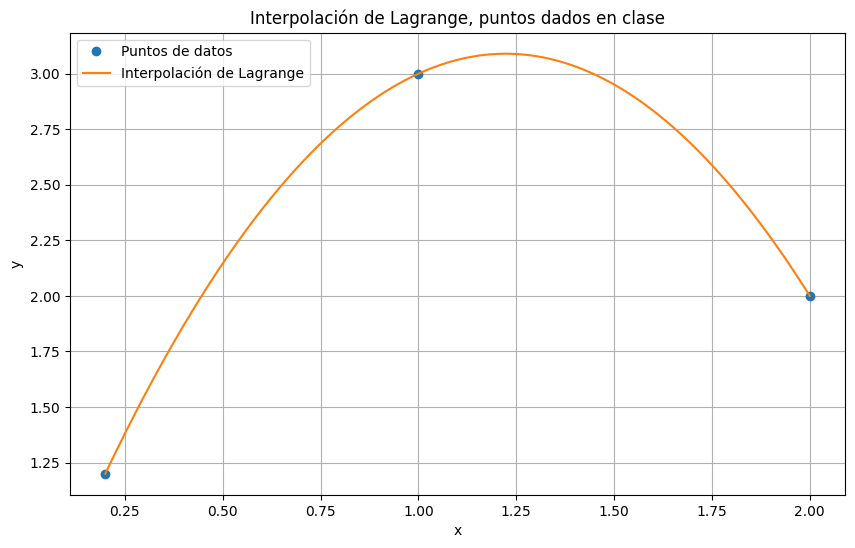

In [3]:
# Interpolación de mil puntos para los tres dados en clase
X = np.linspace(min(x), max(x), num=1000)
Y = lagrange(x, y, X)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Puntos de datos')
plt.plot(X, Y, '-', label='Interpolación de Lagrange')
plt.title('Interpolación de Lagrange, puntos dados en clase')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

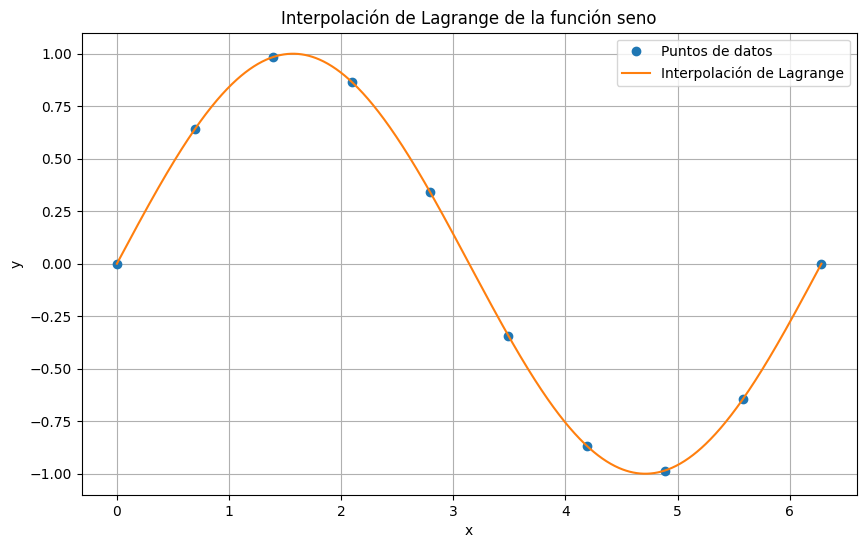

In [4]:
# Interpolación de mil puntos para 10 valores de la función seno
x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x)

# Prueba
X = np.linspace(min(x), max(x), num=1000)
Y = lagrange(x, y, X)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Puntos de datos')
plt.plot(X, Y, '-', label='Interpolación de Lagrange')
plt.title('Interpolación de Lagrange de la función seno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()